In [2]:
try:
    import keras
except ModuleNotFoundError:
    import sys
    !conda install --yes --prefix {sys.prefix} -c conda-forge keras

Solving environment: done

## Package Plan ##

  environment location: /root/anaconda3

  added / updated specs: 
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    toolchain-2.4.0            |                0           4 KB  conda-forge
    toolchain_cxx_linux-64-2.4.0|                0           4 KB  conda-forge
    theano-1.0.3               |   py36hfc679d8_1         3.6 MB  conda-forge
    keras-2.2.4                |           py36_0         456 KB  conda-forge
    absl-py-0.6.1              |        py36_1000         151 KB  conda-forge
    libprotobuf-3.6.1          |       hd28b015_0         4.0 MB  conda-forge
    markdown-2.6.11            |             py_0          56 KB  conda-forge
    libgpuarray-0.7.6          |       h470a237_3         240 KB  conda-forge
    keras-applications-1.0.4   |             py_1          26 KB  conda-forge
    toolchain_c_linux-64-

In [27]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
np.random.seed(7)

In [6]:
dataset = pd.read_csv('https://media.githubusercontent.com/media/amasend/Master-Thesis/master/data/Skyserver.csv', delimiter=',',
                      index_col=0, dtype={'ra': np.float64, 'dec': np.float64,'u': np.float64, 'g': np.float64, 'r': np.float64,
                                          'i': np.float64, 'z': np.float64, 'run': np.uint16, 'rerun': np.uint16, 'camcol': np.uint16,
                                          'field': np.uint16, 'spaceobjid': np.float64, 'class': np.object_, 'redshift': np.float64,
                                          'plate': np.uint16, 'mjd': np.uint16, 'fiberid': np.uint16})
dataset.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,,,,,,,,,,,,,,,,,
1237648675604791614,241.342917,1.174301,19.51355,19.20316,19.45578,19.71678,19.94081,745,301,6,552,387465727008860160,STAR,-0.000276,344,51693,568
1237648675604791855,241.453357,1.103976,19.27841,18.15512,17.91325,17.84251,17.83266,745,301,6,552,387464077741418496,STAR,-0.000640,344,51693,562
1237648675604987914,241.766475,1.108192,18.36716,16.15226,15.06507,14.51372,14.05285,745,301,6,555,388525106411890688,GALAXY,0.027258,345,51690,326
1237648675604988405,241.852655,1.138415,19.53237,17.64661,16.59679,16.07399,15.67989,745,301,6,555,388527855190960128,GALAXY,0.056678,345,51690,336
1237648675605053923,242.032775,1.085364,17.92471,16.89563,16.34107,16.06352,15.82847,745,301,6,556,388535826650261504,GALAXY,0.024477,345,51690,365
1237648675605119332,242.104730,1.107362,19.35062,17.90006,17.33493,16.98621,16.73307,745,301,6,557,388534727138633728,GALAXY,0.081448,345,51690,361
1237648675605119520,242.186567,1.078929,18.87871,17.66926,17.05803,16.73153,16.41729,745,301,6,557,388537201039796224,GALAXY,0.027761,345,51690,370
1237648675605119699,242.103892,1.135321,19.51914,18.35248,17.83754,17.54294,17.34665,745,301,6,557,388539125185144832,GALAXY,0.055745,345,51690,377
1237648675605184926,242.273333,1.082978,19.36918,18.02738,17.53441,17.23723,17.04132,745,301,6,558,388547371522353152,GALAXY,0.055334,345,51690,407


In [7]:
dataset.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.0,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000
mean,184.469712,26.611038,18.637816,17.402729,16.872771,16.572087,16.371896,3186.04532,301.0,3.495666,192.671966,2.290113e+18,0.168878,2033.946298,53508.687954,338.338970
std,70.601232,20.943474,0.834009,0.985099,1.129428,20.067469,28.356781,1108.29686,0.0,1.594627,144.843694,1.859963e+18,0.429904,1651.968287,1292.861646,205.251468
min,0.002795,-11.252825,6.752484,7.466997,8.449127,-9999.000000,-9999.000000,94.00000,301.0,1.000000,11.000000,2.994897e+17,-0.004136,266.000000,51578.000000,1.000000
25%,146.089530,6.931499,18.215947,16.849258,16.192040,15.860735,15.618368,2326.00000,301.0,2.000000,85.000000,1.062866e+18,0.000040,944.000000,52520.000000,167.000000
50%,186.624394,28.622863,18.872355,17.519685,16.895590,16.597610,16.419670,3530.00000,301.0,4.000000,157.000000,1.863503e+18,0.051127,1655.000000,53172.000000,332.000000
75%,225.566248,43.609358,19.271710,18.051780,17.569720,17.316560,17.198712,3970.00000,301.0,5.000000,257.000000,2.691005e+18,0.097282,2390.000000,54437.000000,497.000000
max,359.998882,79.742295,19.600000,19.996050,33.209920,32.349170,30.846780,5061.00000,301.0,6.000000,1001.000000,1.008270e+19,7.009400,8955.000000,57520.000000,1000.000000


In [8]:
dataset.shape

(500000, 17)

# Split data into training, validation and test datasets

In [14]:
# how many rows entire dataset has
n_rows, n_cols = dataset.shape
# get column names and change order
columns = dataset.columns.tolist()
del columns[12]
columns.append('class')
# check if dataset consists of empty values
columns_missing = [col for col in dataset.columns if dataset[col].isnull().any()]
if columns_missing:
    print("Dataset has missing values in the following columns:\n{}".format(columns_missing))
else:
    print("Dataset do not has any column with empty value.")
# split data accordingly:
# test data: 30% of entire dataset
X = dataset.drop(['class'], axis=1).values
Y = dataset['class'].values
# encode class values as integers

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, Y):
    train, test = X[train_index], X[test_index]
    y_train_dummy, y_test_dummy = dummy_y[train_index], dummy_y[test_index]
    y_train, y_test = Y[train_index], Y[test_index]   

# split data into training and validation
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
for train_index, valid_index in sss.split(train, y_train):
    training, valid = train[train_index], train[valid_index]
    y_training_dummy, y_valid_dummy = y_train_dummy[train_index], y_train_dummy[valid_index]
    y_training, y_valid = y_train[train_index], y_train[valid_index] 
    
training = pd.DataFrame(data=training, columns=dataset.drop(['class'], axis=1).columns.values)
valid = pd.DataFrame(data=valid, columns=dataset.drop(['class'], axis=1).columns.values)
test = pd.DataFrame(data=test, columns=dataset.drop(['class'], axis=1).columns.values)

Dataset do not has any column with empty value.


In [15]:
training.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.174093,49.448766,19.43246,19.55958,19.38500,19.10410,18.90479,2964.0,301.0,2.0,314.0,1.091008e+18,2.052048,969.0,52442.0,39.0
1,316.492616,-0.986154,19.45450,18.12955,17.45111,17.06642,16.76836,4207.0,301.0,1.0,81.0,1.109082e+18,0.097422,985.0,52431.0,257.0
2,234.238098,5.223175,18.04882,17.13407,16.78604,16.63787,16.58097,3910.0,301.0,4.0,160.0,2.067259e+18,-0.000622,1836.0,54567.0,387.0
3,194.084443,29.300139,17.52633,15.77371,15.05019,14.69643,14.47584,4649.0,301.0,3.0,79.0,2.264256e+18,0.022133,2011.0,53499.0,260.0
4,149.933392,11.767889,17.98325,17.03340,16.73768,16.62561,16.61193,4338.0,301.0,2.0,47.0,5.998918e+18,-0.000346,5328.0,55982.0,448.0


In [16]:
valid.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,332.813299,-9.533094,19.21575,18.21986,17.85296,17.57790,17.36675,1659.0,301.0,1.0,185.0,8.084143e+17,0.040685,718.0,52206.0,66.0
1,163.824097,30.042511,18.63503,17.53452,16.86758,16.48927,16.28263,4623.0,301.0,2.0,49.0,2.230414e+18,0.144731,1981.0,53463.0,23.0
2,224.398702,41.637804,18.57859,17.86956,17.66634,17.56759,17.50669,2964.0,301.0,1.0,511.0,1.452435e+18,0.025193,1290.0,52734.0,87.0
3,8.540218,-11.086299,19.23722,17.95485,17.41249,17.17080,17.08046,1666.0,301.0,1.0,248.0,3.495934e+18,-0.000248,3105.0,54825.0,53.0
4,355.691946,-9.935361,18.60416,17.22464,16.64223,16.41085,16.29378,1855.0,301.0,3.0,73.0,2.602041e+18,-0.000179,2311.0,54331.0,313.0


In [17]:
test.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,173.503131,42.912831,18.54982,17.65409,17.31709,17.05927,17.03511,3840.0,301.0,6.0,119.0,1.624833e+18,0.072292,1443.0,53055.0,580.0
1,209.700431,46.342786,18.77968,17.83900,17.53301,17.41497,17.38628,2964.0,301.0,1.0,434.0,7.599931e+18,-0.000749,6750.0,56367.0,388.0
2,181.108072,67.645139,18.80357,17.29099,16.54827,16.15786,15.88195,1350.0,301.0,4.0,359.0,5.551984e+17,0.079794,493.0,51957.0,472.0
3,165.186868,48.170223,18.86779,17.91338,17.55926,17.41324,17.37775,2964.0,301.0,3.0,234.0,2.691062e+18,-0.000150,2390.0,54094.0,588.0
4,323.640260,-8.641964,19.14085,17.14826,16.23512,15.80941,15.48590,2575.0,301.0,1.0,58.0,7.217134e+17,0.077047,641.0,52176.0,42.0


In [20]:
y_training

array(['QSO', 'GALAXY', 'STAR', ..., 'GALAXY', 'GALAXY', 'STAR'],
      dtype=object)

In [21]:
print("Training data shape: {}".format(training.shape[0]))
print("Validation data shape: {}".format(valid.shape[0]))
print("Test data shape: {}".format(test.shape[0]))

Training data shape: 320000
Validation data shape: 80000
Test data shape: 100000


In [22]:
print("Does training dataset contain missing values: {}".format(training.isnull().values.any()))
print("Does validation dataset contain missing values: {}".format(valid.isnull().values.any()))
print("Does test dataset contain missing values: {}".format(test.isnull().values.any()))

Does training dataset contain missing values: False
Does validation dataset contain missing values: False
Does test dataset contain missing values: False


Text(0, 0.5, 'Number')

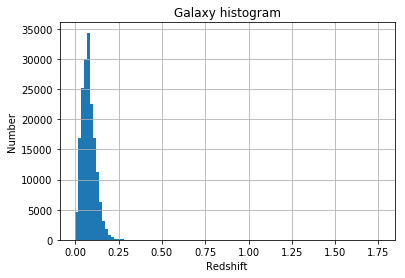

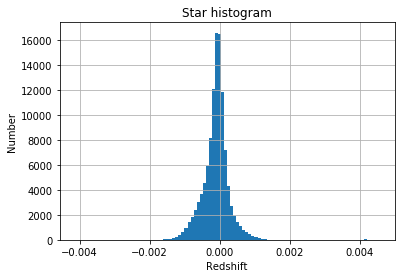

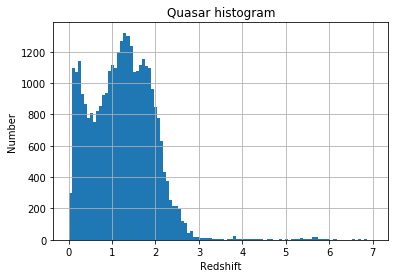

In [25]:
data = training
data['class'] = y_training
data = data[['redshift', 'class']]

data[data['class'].str.contains('GALAXY')].hist(bins=100)
plt.title('Galaxy histogram')
plt.xlabel('Redshift')
plt.ylabel('Number')
data[data['class'].str.contains('STAR')].hist(bins=100)
plt.title('Star histogram')
plt.xlabel('Redshift')
plt.ylabel('Number')
data[data['class'].str.contains('QSO')].hist(bins=100)
plt.title('Quasar histogram')
plt.xlabel('Redshift')
plt.ylabel('Number')

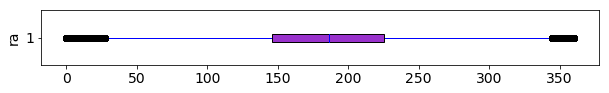

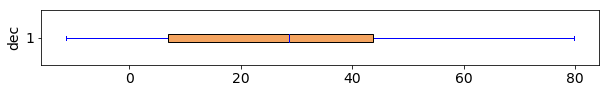

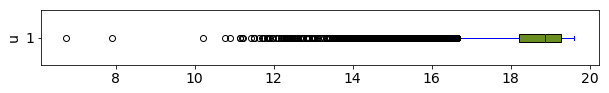

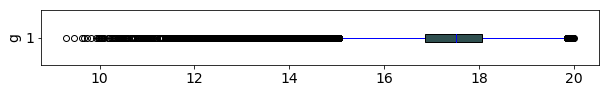

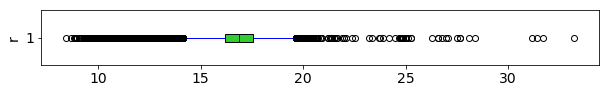

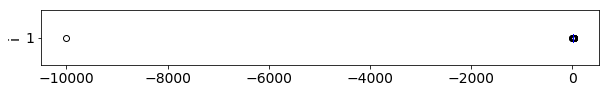

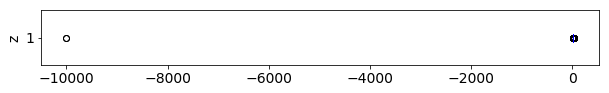

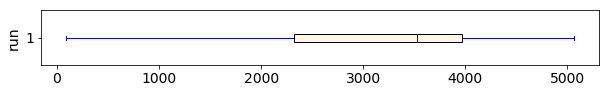

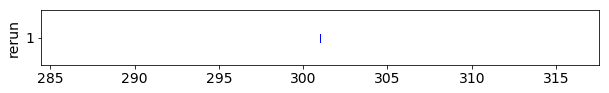

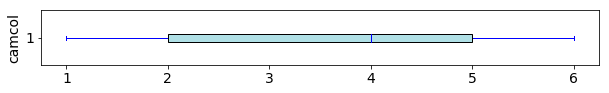

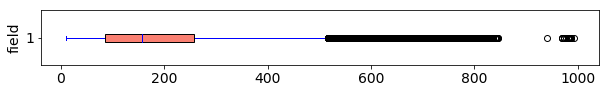

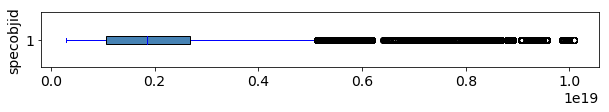

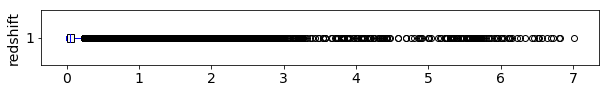

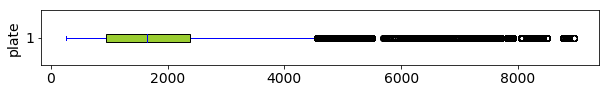

In [28]:
colors = ['#9932CC', '#F4A460', '#6B8E23', '#2F4F4F', '#32CD32', '#9370DB', '#FFE4B5', '#FDF5E6', '#EEE8AA',
          '#B0E0E6', '#FA8072', '#4682B4', '#F5F5F5', '#9ACD32']
matplotlib.rcParams.update({'font.size': 14})
for col, color in zip(training.columns.values, colors):
    fig, ax = plt.subplots(figsize=(10,1))
#     fig(figsize=(15,2))
    box = ax.boxplot(training[col], vert=False, patch_artist=True)
    box['boxes'][0].set(facecolor=color)
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(box[element], color='b')
    plt.ylabel(col)

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/root/anaconda3/lib/python3.6/site-packages/matplotlib/projections/geo.py:421: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


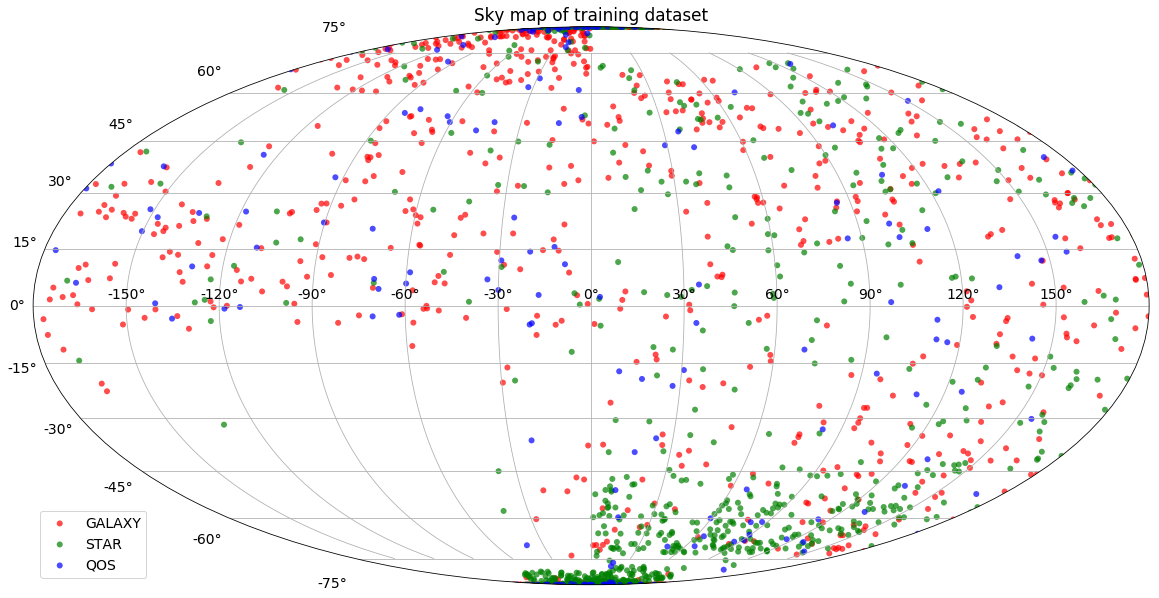

In [29]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='mollweide')
data = training[['ra', 'dec']]
data['class'] = y_training
category = [data[data['class'].str.contains('GALAXY')], 
            data[data['class'].str.contains('STAR')], 
            data[data['class'].str.contains('QSO')]]
colors = ['red', 'green', 'blue']
classes = ['GALAXY', 'STAR', 'QOS']
for cat, color, class_ in zip(category, colors, classes):
    ax.scatter(cat['ra'], cat['dec'], c=color, label=class_, alpha=0.7, edgecolors='none')
ax.legend()
ax.grid(True)
plt.title('Sky map of training dataset')
fig.savefig('sky_train_plot.pdf')

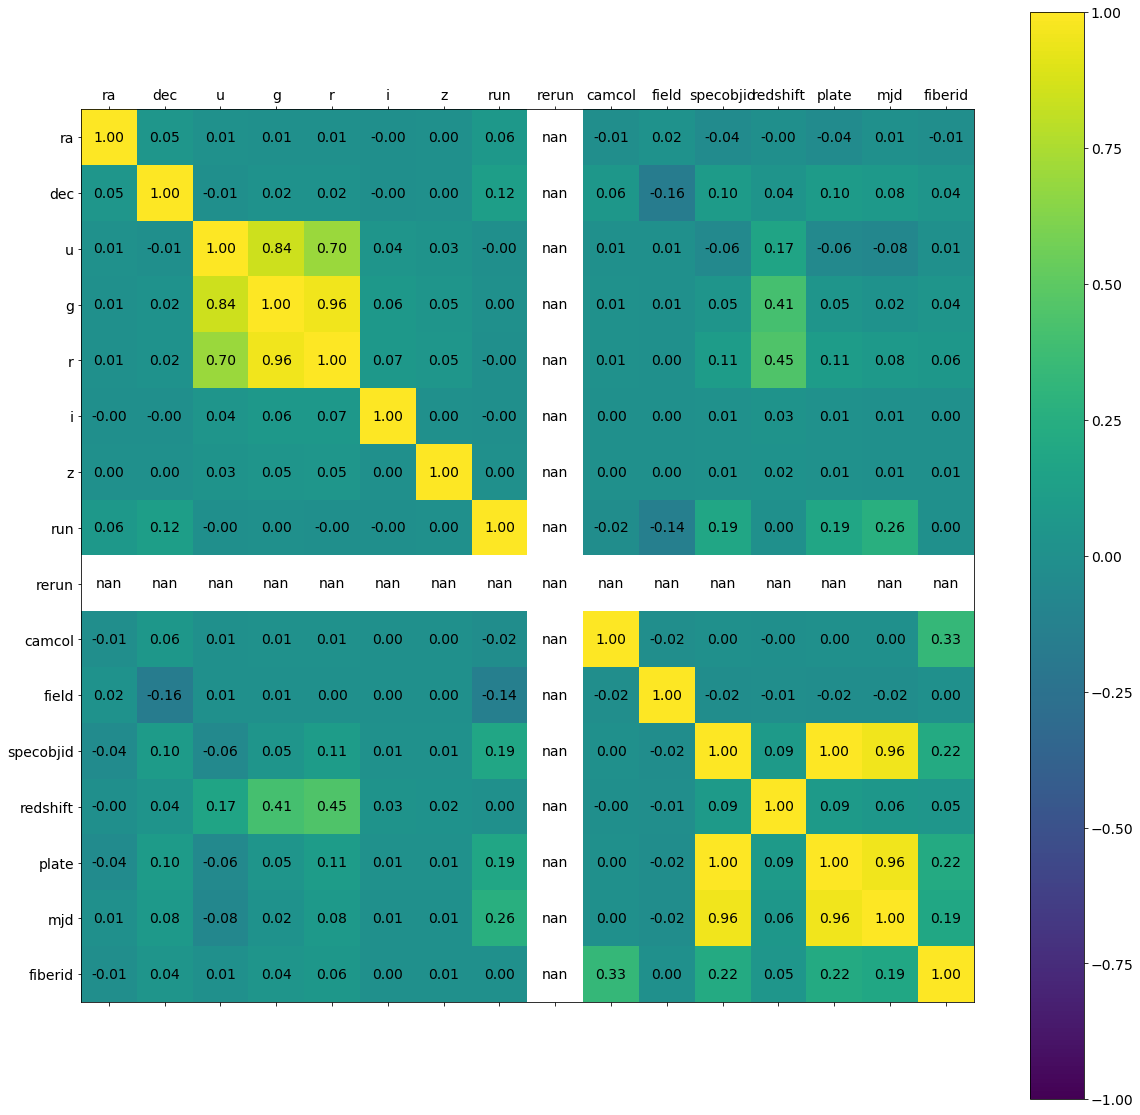

In [30]:
correlation = training.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1, interpolation='none')
ticks = [i for i in range(training.shape[1])]
ticklabels = training.columns.values.tolist()
plt.xticks(ticks, ticklabels)
plt.yticks(ticks, ticklabels)
ax.axis('image')
# Text on the plot
for y, row in enumerate(correlation.values):
    for x, val in enumerate(row):
        ax.text(x, y, format(val, '.2f'), color='black', ha='center', va='center')   
fig.colorbar(cax)
fig.savefig('train_correlation_plot.pdf')

**Before log transform**

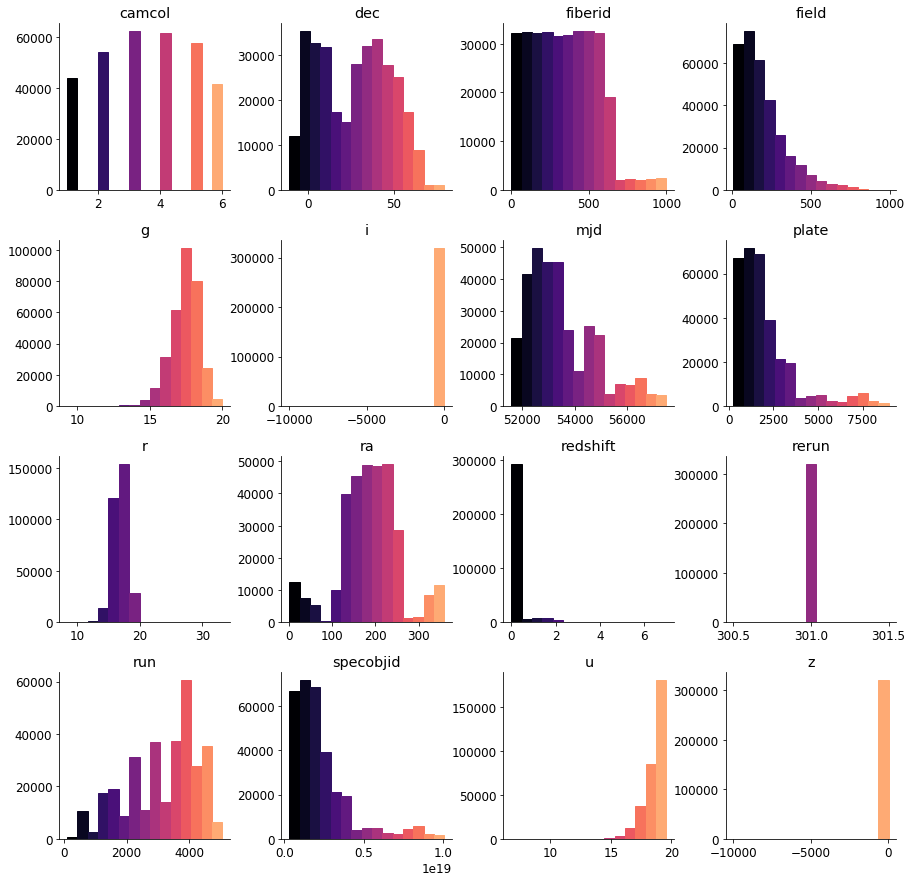

In [31]:
colors = [matplotlib.colors.rgb2hex(i) for i in plt.get_cmap('magma').colors][50:100]
colors = plt.get_cmap('magma').colors[::15]
# colors = ['#9932CC', '#F4A460', '#6B8E23', '#2F4F4F', '#32CD32', '#9370DB', '#FFE4B5', '#FDF5E6', '#EEE8AA',
#           '#B0E0E6', '#FA8072', '#4682B4', '#F5F5F5', '#9ACD32']
matplotlib.rcParams.update({'font.size': 12})
axes = training.hist(figsize=(15,15), bins=15)
for row in axes:
    for ax in row:
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        for patch, color in zip(ax.patches, colors):
            if patch.get_height() > 0:
                patch.set_color(color)

In [32]:
training['specobjid'] = np.log(training['specobjid'])
training['field'] = np.log(training['field'])
training['run'] = np.log(training['run'])
training['plate'] = np.log(training['plate'])

**After log transform**

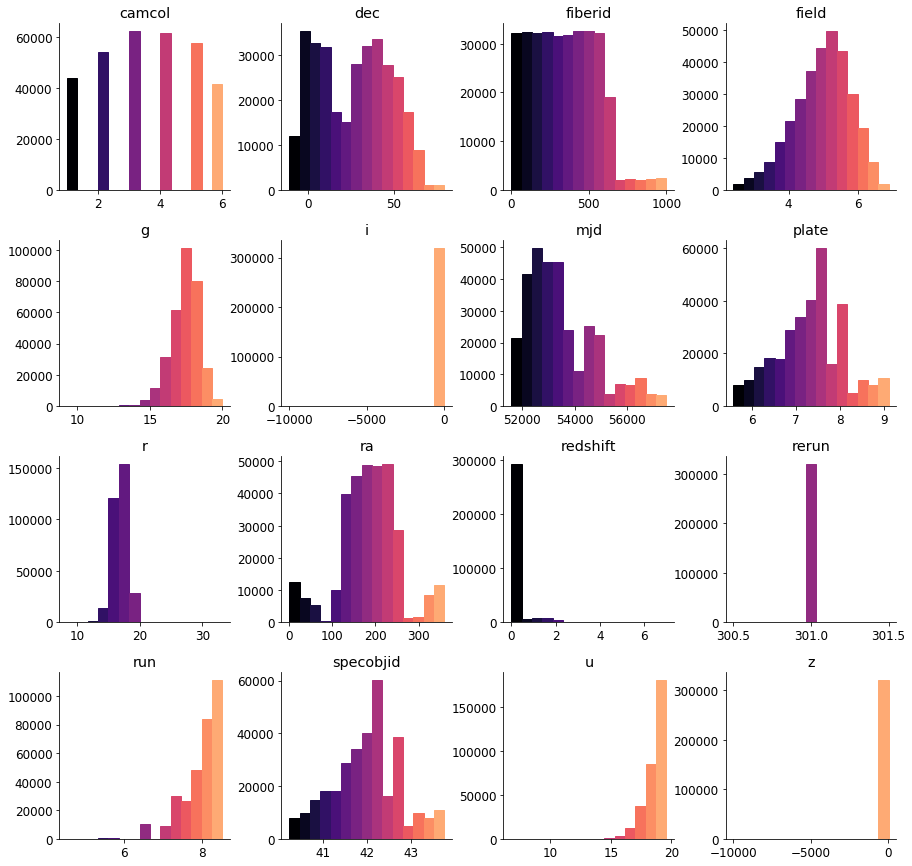

In [33]:
colors = [matplotlib.colors.rgb2hex(i) for i in plt.get_cmap('magma').colors][50:100]
colors = plt.get_cmap('magma').colors[::15]
# colors = ['#9932CC', '#F4A460', '#6B8E23', '#2F4F4F', '#32CD32', '#9370DB', '#FFE4B5', '#FDF5E6', '#EEE8AA',
#           '#B0E0E6', '#FA8072', '#4682B4', '#F5F5F5', '#9ACD32']
matplotlib.rcParams.update({'font.size': 12})
axes = training.hist(figsize=(15,15), bins=15)
for row in axes:
    for ax in row:
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        for patch, color in zip(ax.patches, colors):
            if patch.get_height() > 0:
                patch.set_color(color)

# Cross-Validation ML algorithms

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
try:
    from xgboost import XGBClassifier
except ModuleNotFoundError:
    import sys
    !conda install --yes --prefix {sys.prefix} -c conda-forge xgboost

Solving environment: | 

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC(probability=True))])))
pipelines.append(('AB', AdaBoostClassifier()))
pipelines.append(('GB', GradientBoostingClassifier()))
pipelines.append(('RF', RandomForestClassifier()))
pipelines.append(('ET', ExtraTreesClassifier()))
pipelines.append(('XGB', XGBClassifier()))